# KNN Project  

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

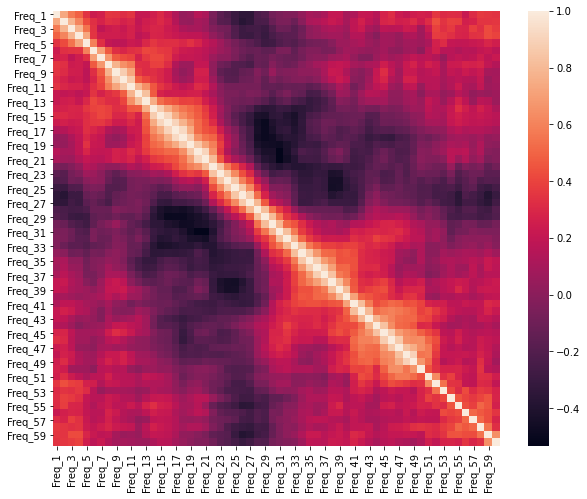

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());

What are the top 5 correlated frequencies with the target\label?**

In [5]:
df["Target"] = df["Label"].map({'M':1 , 'R':0})

In [6]:
df["Label"].value_counts()

M    111
R     97
Name: Label, dtype: int64

In [7]:
df.corr()["Target"].sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

*Note: The solution uses a random_state=42*

In [8]:
# CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X = df.drop(["Label", "Target"], axis=1)
y = df["Label"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
scaler = StandardScaler()
knn_model = KNeighborsClassifier()

Create a PipeLine that contains both a StandardScaler and a KNN model

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
operations = [('scaler' , scaler), ('knn_model', knn_model)]

In [14]:
pipe = Pipeline(operations)

Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.

In [15]:
k_values = list(range(1,30))
param_grid = {'knn_model__n_neighbors': k_values}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
full_cv_model = GridSearchCV(pipe,param_grid,
                            cv=5,scoring='accuracy')

In [18]:
full_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19, 20, 21, 22, 23,
                                                    24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [19]:
full_cv_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn_model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn_model': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 1,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [20]:
mean_test_score = full_cv_model.cv_results_["mean_test_score"]

In [21]:
mean_test_score

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

In [22]:
full_cv_model.cv_results_

{'mean_fit_time': array([0.01016927, 0.00458746, 0.00578432, 0.00499268, 0.00480556,
        0.00497637, 0.00538034, 0.00478716, 0.00498705, 0.00478334,
        0.00479426, 0.0053854 , 0.00538549, 0.00478778, 0.00538545,
        0.00478172, 0.00518222, 0.00518718, 0.00478711, 0.00558496,
        0.00578442, 0.00498681, 0.00478735, 0.00538564, 0.00498672,
        0.00538554, 0.00500488, 0.00539618, 0.00538507]),
 'std_fit_time': array([6.16251230e-03, 4.88460995e-04, 3.98779215e-04, 1.23033227e-05,
        3.87777012e-04, 1.79746738e-05, 4.82505637e-04, 3.98731488e-04,
        1.21943587e-06, 3.96926348e-04, 4.03329902e-04, 4.88714053e-04,
        4.88247037e-04, 3.99041614e-04, 4.88285706e-04, 4.07947970e-04,
        4.00937641e-04, 3.98447954e-04, 3.98826685e-04, 4.88616621e-04,
        1.16313736e-03, 6.30525281e-04, 3.99065060e-04, 4.88616597e-04,
        1.78416128e-07, 4.88499843e-04, 6.48164751e-04, 4.80597437e-04,
        4.88402647e-04]),
 'mean_score_time': array([0.00498295, 

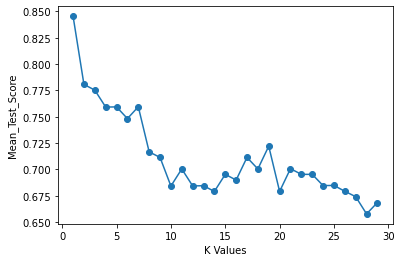

In [23]:
plt.plot(k_values, mean_test_score,"o-")
plt.xlabel("K Values")
plt.ylabel("Mean_Test_Score");

### Final Model Evaluation

Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
final_pred = full_cv_model.predict(X_test)

In [26]:
Accuracy_Score = accuracy_score(y_test, final_pred)

In [27]:
confusion_matrix(y_test , final_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [28]:
print(classification_report(y_test , final_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

